In [1]:
from ema_workbench.analysis import feature_scoring
import pickle
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

## Real data

In [2]:
from ema_workbench.analysis.feature_scoring import RuleInductionType, get_univariate_feature_scores,get_rf_feature_scores,get_ex_feature_scores

algorithms = {
    "extra trees": get_ex_feature_scores,
    "random forest": get_rf_feature_scores,
    "univariate": get_univariate_feature_scores,
}

def get_feature_scores_all(
    x, y, alg="extra trees", mode=RuleInductionType.REGRESSION, **kwargs
):
    """perform feature scoring for all outcomes using the specified feature
    scoring algorithm
    Parameters
    ----------
    x : DataFrame
    y : dict of 1d numpy arrays
        the outcomes, with a string as key, and a 1D array for each outcome
    alg : {'extra trees', 'random forest', 'univariate'}, optional
    mode : {RuleInductionType.REGRESSION, RuleInductionType.CLASSIFICATION}, optional
    kwargs : dict, optional
             any remaining keyword arguments will be passed to the specific
             feature scoring algorithm
    Returns
    -------
    DataFrame instance
    """
    oob_values = {"outcome": [], "oob_score": []}
    complete = []
    for key, value in y.items():
        fs, regressor = algorithms[alg](x, value, mode=mode, **kwargs)

        fs = fs.rename(columns={1: key})
        complete.append(fs)
        # if complete is None:
        #     complete = fs.T
        # else:
        #     complete = complete.append(fs.T, sort=True)
        if hasattr(regressor, 'oob_score'):
            oob_values['outcome'].append(key)
            oob_values['oob_score'].append(regressor.oob_score_)
        else:
            print('no oob_score for', key, value)

    complete = pd.concat(complete, sort=True, axis=1)
    if hasattr(regressor, 'oob_score'):
        return complete, pd.DataFrame(oob_values)
    else:
        return complete


    # if hasattr(regressor, 'oob_score'):
    #     return complete, oob_values
    # else:

In [4]:
outcomes

{'fraction_captured_total': array([0.22167703, 0.10306906, 0.47266896, ..., 0.33963078, 0.08453221,
        0.39133987]),
 'serviceable_fraction': array([0.25904204, 0.10306906, 0.7243849 , ..., 0.71573445, 0.08453221,
        0.74501052]),
 'served_fraction': array([0.85575697, 1.        , 0.65251079, ..., 0.47452066, 1.        ,
        0.525281  ]),
 'non_zero_flows': array([{'22637863': 1.0, '22638019': 1.0, '22638146': 1.0, '22638156': 0.0, '22638320': 0.0, '22638327': 1.0, '22638404': 1.0, '30984595': 1.0, '30986757': 0.0, '8860582': 0.0, '8861305': 0.0, '8861380': 0.0, '8861462': 0.0, '8861528': 1.0, '8861546': 0.0, '8861563': 0.0, '8861568': 0.0, '8861625': 1.0, '8862419': 0.0, '8862448': 1.0, '8862497': 1.0, '8862506': 0.0, '8862570': 0.0, '8862687': 0.0, '8862776': 0.0, '8862992': 0.0, '8863019': 1.0, '8863125': 0.0, '8863206': 1.0, '8863207': 0.0, '8863306': 2.0, '8863360': 1.0, '8863408': 0.0, '8863469': 0.0, '8863475': 0.0, '8863518': 1.0, '8863570': 0.0, '8863599': 1.0, '

In [2]:
experiments = pickle.load( open("results/experiments_new20100.p", "rb"))
outcomes = pickle.load( open("results/outcomes_new20100.p", "rb"))

# outcomes.pop('total_flow')
# outcomes.pop('optimal_facilities')
# outcomes.pop('non_zero_flows')
# outcomes.pop('add_nodes_used')
# x = experiments
# y = outcomes
#
# fs, oob_scores = get_feature_scores_all(x, y, oob_score=True)
# sns.heatmap(fs, cmap="viridis", annot=True)
# plt.show()

In [7]:
oob_scores

,outcome,oob_score
0,fraction_captured_total,0.990376
1,serviceable_fraction,0.995296
2,served_fraction,0.981991


## Random samples

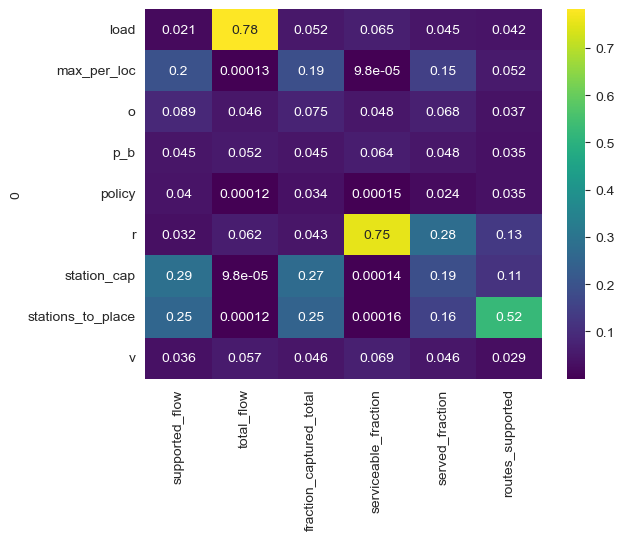

In [13]:
experiments = pickle.load( open("results/experiments_new100100random.p", "rb"))
outcomes = pickle.load( open("results/outcomes_new100100random.p", "rb"))

x = experiments
y = outcomes

fs, oob_scores = get_feature_scores_all(x, y, oob_score=True)
sns.heatmap(fs, cmap="viridis", annot=True)
plt.show()

In [14]:
oob_scores

,outcome,oob_score
0,supported_flow,0.968289
1,total_flow,0.999775
2,fraction_captured_total,0.970700
3,serviceable_fraction,0.999819
4,served_fraction,0.966149
5,routes_supported,0.939979


In [3]:
experiments

,r,c,p,x_m,scenario,policy,model
0,94770.849566,1762.0,65.0,2.0,100,0,frlm
1,70440.795211,1762.0,65.0,2.0,101,0,frlm
2,139653.674253,1762.0,65.0,2.0,102,0,frlm
3,52583.484601,1762.0,65.0,2.0,103,0,frlm
4,60644.563880,1762.0,65.0,2.0,104,0,frlm
...,...,...,...,...,...,...,...
1995,129616.802128,948.0,192.0,2.0,115,99,frlm
1996,97918.995123,948.0,192.0,2.0,116,99,frlm
1997,132607.938338,948.0,192.0,2.0,117,99,frlm
1998,55834.710548,948.0,192.0,2.0,118,99,frlm


In [4]:
outcomes

{'total_flow': array([2941841.19047622, 2941841.19047622, 2941841.19047622, ...,
        2941841.19047622, 2941841.19047622, 2941841.19047622]),
 'fraction_captured_total': array([0.22167703, 0.10306906, 0.47266896, ..., 0.33963078, 0.08453221,
        0.39133987]),
 'serviceable_fraction': array([0.25904204, 0.10306906, 0.7243849 , ..., 0.71573445, 0.08453221,
        0.74501052]),
 'served_fraction': array([0.85575697, 1.        , 0.65251079, ..., 0.47452066, 1.        ,
        0.525281  ]),
 'non_zero_flows': array([{'22637863': 1.0, '22638019': 1.0, '22638146': 1.0, '22638156': 0.0, '22638320': 0.0, '22638327': 1.0, '22638404': 1.0, '30984595': 1.0, '30986757': 0.0, '8860582': 0.0, '8861305': 0.0, '8861380': 0.0, '8861462': 0.0, '8861528': 1.0, '8861546': 0.0, '8861563': 0.0, '8861568': 0.0, '8861625': 1.0, '8862419': 0.0, '8862448': 1.0, '8862497': 1.0, '8862506': 0.0, '8862570': 0.0, '8862687': 0.0, '8862776': 0.0, '8862992': 0.0, '8863019': 1.0, '8863125': 0.0, '8863206': 1.0, 

In [5]:
df = pd.merge(experiments,pd.DataFrame(outcomes), left_index=True, right_index=True)

<AxesSubplot:xlabel='r', ylabel='fraction_captured_total'>

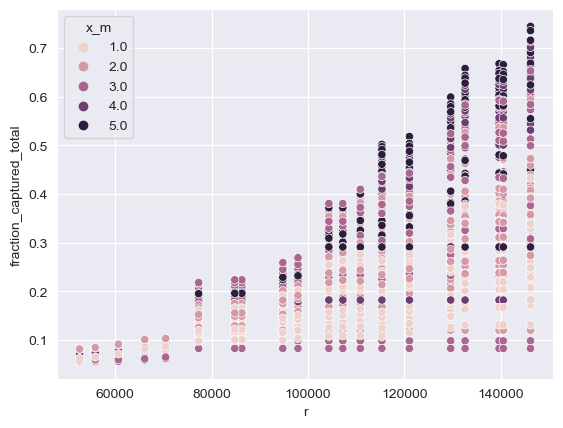

In [8]:
sns.scatterplot(x='r', y='fraction_captured_total', hue='x_m', data=df)

<AxesSubplot:xlabel='r', ylabel='fraction_captured_total'>

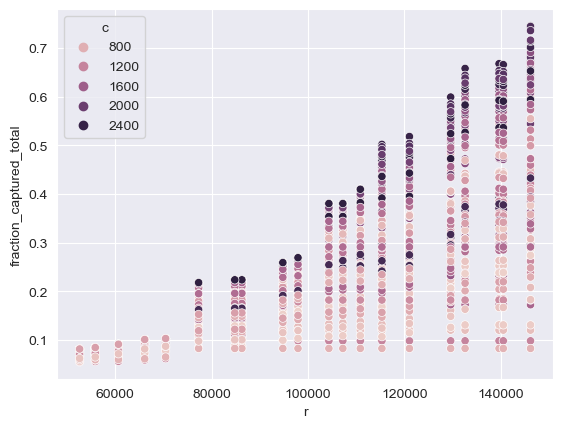

In [10]:
sns.scatterplot(x='r', y='fraction_captured_total', hue='c', data=df)

<AxesSubplot:xlabel='p', ylabel='fraction_captured_total'>

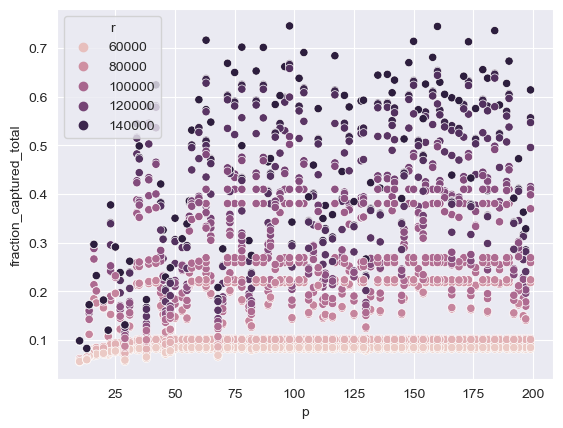

In [11]:
sns.scatterplot(x='p', y='fraction_captured_total', hue='r', data=df)

In [14]:
best = df.loc[(df.c>=2000)&(df.x_m==5)]

In [15]:
best

,r,c,p,x_m,scenario,policy,model,total_flow,fraction_captured_total,serviceable_fraction,served_fraction,non_zero_flows,optimal_facilities,add_nodes_used
1480,94770.849566,2395.0,98.0,5.0,100,74,frlm,2.941841e+06,0.259042,0.259042,1.000000,"{'22637863': 1.0, '22638019': 1.0, '22638146':...","{('NLABL', 'NLRTM', 0): {'combinations': [['88...",0.0
1481,70440.795211,2395.0,98.0,5.0,101,74,frlm,2.941841e+06,0.103069,0.103069,1.000000,"{'22637863': 1.0, '22638019': 1.0, '22638146':...","{('NLABL', 'NLRTM', 0): {'combinations': [['88...",0.0
1482,139653.674253,2395.0,98.0,5.0,102,74,frlm,2.941841e+06,0.667393,0.724385,0.921324,"{'22637863': 1.0, '22638019': 0.0, '22638146':...","{('NLABL', 'NLRTM', 0): {'combinations': [['88...",0.0
1483,52583.484601,2395.0,98.0,5.0,103,74,frlm,2.941841e+06,0.081587,0.081587,1.000000,"{'22637863': 1.0, '22638019': 1.0, '22638146':...","{('NLABL', 'NLRTM', 0): {'combinations': [['88...",0.0
1484,60644.563880,2395.0,98.0,5.0,104,74,frlm,2.941841e+06,0.091274,0.091274,1.000000,"{'22637863': 1.0, '22638019': 1.0, '22638146':...","{('NLABL', 'NLRTM', 0): {'combinations': [['88...",0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1755,129616.802128,2025.0,63.0,5.0,115,87,frlm,2.941841e+06,0.568757,0.623944,0.911551,"{'22637863': 1.0, '22638019': 0.0, '22638146':...","{('NLABL', 'NLRTM', 0): {'combinations': [['88...",0.0
1756,97918.995123,2025.0,63.0,5.0,116,87,frlm,2.941841e+06,0.269094,0.269094,1.000000,"{'22637863': 1.0, '22638019': 1.0, '22638146':...","{('NLABL', 'NLRTM', 0): {'combinations': [['88...",0.0
1757,132607.938338,2025.0,63.0,5.0,117,87,frlm,2.941841e+06,0.627514,0.715734,0.876742,"{'22637863': 0.0, '22638019': 0.0, '22638146':...","{('NLABL', 'NLRTM', 0): {'combinations': [['88...",0.0
1758,55834.710548,2025.0,63.0,5.0,118,87,frlm,2.941841e+06,0.084532,0.084532,1.000000,"{'22637863': 1.0, '22638019': 1.0, '22638146':...","{('NLABL', 'NLRTM', 0): {'combinations': [['88...",0.0


<AxesSubplot:xlabel='p', ylabel='fraction_captured_total'>

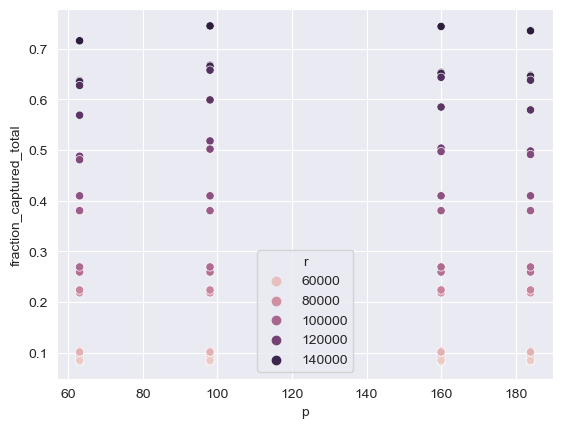

In [16]:
sns.scatterplot(x='p', y='fraction_captured_total', hue='r', data=best)